#### The script is designed to compare four methods of estimating IGE- RDR, BiSEMPGS and PGS-based regression when the data is generated under various conditions of univariate vertical transmission, assortative mating and genetic effects. 

In [6]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# read all the summary statistics
df_sum_SEMPGS = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/BiSEMPGS/summary_table.tsv', sep='\t')

df_sum_RDR_Ve = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_Ve_est.tsv', sep='\t')
df_sum_RDR_VG1 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_VG1_est.tsv', sep='\t')
df_sum_RDR_VG2 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_VG2_est.tsv', sep='\t')
df_sum_RDR_VG3 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_VG3_est.tsv', sep='\t')
df_sum_RDR_Vp = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_Vp_est.tsv', sep='\t')

df_sum_kong_trait1 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/PGS-Regression/results/regression_trait1_kong_r2_summary_stats.tsv', sep='\t')
df_sum_kong_trait2 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/PGS-Regression/results/regression_trait2_kong_r2_summary_stats.tsv', sep='\t')
df_sum_fullrgs_trait1 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/PGS-Regression/results/regression_trait1_full_pgs_r2_summary_stats.tsv', sep='\t')
df_sum_fullrgs_trait2 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/PGS-Regression/results/regression_trait2_full_pgs_r2_summary_stats.tsv', sep='\t')

#### First we will compare full PGS regression, haplotypic PGS regression and SEM-PGS's estimate on the proportion of variance explained by indirect genetic effects. 

In [47]:
# first obtain the proportion of variance explained by indirect genetic effects from SEM-PGS
# create a named vector to store the results
sem_pgs_ige_results = {}
onlyPheVT_idx_ige = (df_sum_SEMPGS['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_SEMPGS['variable'] == 'phi11')
onlyPheVT_idx_VY  = (df_sum_SEMPGS['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_SEMPGS['variable'] == 'VY11')
sem_pgs_ige_results['onlyVT'] = df_sum_SEMPGS.loc[onlyPheVT_idx_ige, 'median'].values[0] / df_sum_SEMPGS.loc[onlyPheVT_idx_VY, 'median'].values[0]

onlySocVT_idx_ige = (df_sum_SEMPGS['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_SEMPGS['variable'] == 'phi22')
onlySocVT_idx_VY  = (df_sum_SEMPGS['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_SEMPGS['variable'] == 'VY22')
sem_pgs_ige_results['onlySocVT'] = df_sum_SEMPGS.loc[onlySocVT_idx_ige, 'median'].values[0] / df_sum_SEMPGS.loc[onlySocVT_idx_VY, 'median'].values[0]

onlyPheAM_idx_ige = (df_sum_SEMPGS['condition'] == '02_t1noVTpheAM_t2noVTnooAM') & (df_sum_SEMPGS['variable'] == 'phi11')
onlyPheAM_idx_VY  = (df_sum_SEMPGS['condition'] == '02_t1noVTpheAM_t2noVTnooAM') & (df_sum_SEMPGS['variable'] == 'VY11')
sem_pgs_ige_results['onlyPheAM'] = df_sum_SEMPGS.loc[onlyPheAM_idx_ige, 'median'].values[0] / df_sum_SEMPGS.loc[onlyPheAM_idx_VY, 'median'].values[0]

noVTnoAM_idx_ige = (df_sum_SEMPGS['condition'] == '02_t1noVTpheAM_t2noVTnooAM') & (df_sum_SEMPGS['variable'] == 'phi22')
noVTnoAM_idx_VY  = (df_sum_SEMPGS['condition'] == '02_t1noVTpheAM_t2noVTnooAM') & (df_sum_SEMPGS['variable'] == 'VY22')
sem_pgs_ige_results['noVTnoAM'] = df_sum_SEMPGS.loc[noVTnoAM_idx_ige, 'median'].values[0] / df_sum_SEMPGS.loc[noVTnoAM_idx_VY, 'median'].values[0]

pheAMpheVT_idx_ige = (df_sum_SEMPGS['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_SEMPGS['variable'] == 'phi11')
pheAMpheVT_idx_VY  = (df_sum_SEMPGS['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_SEMPGS['variable'] == 'VY11')
sem_pgs_ige_results['pheAMpheVT'] = df_sum_SEMPGS.loc[pheAMpheVT_idx_ige, 'median'].values[0] / df_sum_SEMPGS.loc[pheAMpheVT_idx_VY, 'median'].values[0]

pheAMsocVT_idx_ige = (df_sum_SEMPGS['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_SEMPGS['variable'] == 'phi22')
pheAMsocVT_idx_VY  = (df_sum_SEMPGS['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_SEMPGS['variable'] == 'VY22')
sem_pgs_ige_results['pheAMsocVT'] = df_sum_SEMPGS.loc[pheAMsocVT_idx_ige, 'median'].values[0] / df_sum_SEMPGS.loc[pheAMsocVT_idx_VY, 'median'].values[0]

print("\nSEM-PGS: proportion of variance explained by indirect genetic effects\n")
df_sem = (
    pd.Series(sem_pgs_ige_results, name="Proportion")
      .reset_index()
      .rename(columns={"index": "Condition"})
)
# print as a neat table, four decimals
print(df_sem.to_string(index=False, float_format="%.4f"))


SEM-PGS: proportion of variance explained by indirect genetic effects

 Condition  Proportion
    onlyVT      0.0270
 onlySocVT      0.0005
 onlyPheAM      0.0007
  noVTnoAM      0.0014
pheAMpheVT      0.0162
pheAMsocVT      0.0002


In [48]:
# get the proportion of variance explained by indirect genetic effects from full PGS regression
fullrgs_ige_results = {}
kong_ige_results = {}

fullrgs_onlyPheVT_idx_totalR2 = (df_sum_fullrgs_trait1['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_fullrgs_trait1['variable'] == 'total_r2_PGSm1')
fullrgs_onlyPheVT_idx_dirR2 = (df_sum_fullrgs_trait1['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_fullrgs_trait1['variable'] == 'total_r2_PGSo1')
fullrgs_ige_results['onlyVT'] = df_sum_fullrgs_trait1.loc[fullrgs_onlyPheVT_idx_totalR2, 'median'].values[0] - df_sum_fullrgs_trait1.loc[fullrgs_onlyPheVT_idx_dirR2, 'median'].values[0]

fullrgs_onlySocVT_idx_totalR2 = (df_sum_fullrgs_trait2['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_fullrgs_trait2['variable'] == 'total_r2_PGSm2')
fullrgs_onlySocVT_idx_dirR2 = (df_sum_fullrgs_trait2['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_fullrgs_trait2['variable'] == 'total_r2_PGSo2')
fullrgs_ige_results['onlySocVT'] = df_sum_fullrgs_trait2.loc[fullrgs_onlySocVT_idx_totalR2, 'median'].values[0] - df_sum_fullrgs_trait2.loc[fullrgs_onlySocVT_idx_dirR2, 'median'].values[0]

fullrgs_onlyPheAM_idx_totalR2 = (df_sum_fullrgs_trait1['condition'] == '02_t1noVTpheAM_t2noVTnoAM') & (df_sum_fullrgs_trait1['variable'] == 'total_r2_PGSm1')
fullrgs_onlyPheAM_idx_dirR2 = (df_sum_fullrgs_trait1['condition'] == '02_t1noVTpheAM_t2noVTnoAM') & (df_sum_fullrgs_trait1['variable'] == 'total_r2_PGSo1')
fullrgs_ige_results['onlyPheAM'] = df_sum_fullrgs_trait1.loc[fullrgs_onlyPheAM_idx_totalR2, 'median'].values[0] - df_sum_fullrgs_trait1.loc[fullrgs_onlyPheAM_idx_dirR2, 'median'].values[0]

fullrgs_noVTnoAM_idx_totalR2 = (df_sum_fullrgs_trait2['condition'] == '02_t1noVTpheAM_t2noVTnoAM') & (df_sum_fullrgs_trait2['variable'] == 'total_r2_PGSm2')
fullrgs_noVTnoAM_idx_dirR2 = (df_sum_fullrgs_trait2['condition'] == '02_t1noVTpheAM_t2noVTnoAM') & (df_sum_fullrgs_trait2['variable'] == 'total_r2_PGSo2')
fullrgs_ige_results['noVTnoAM'] = df_sum_fullrgs_trait2.loc[fullrgs_noVTnoAM_idx_totalR2, 'median'].values[0] - df_sum_fullrgs_trait2.loc[fullrgs_noVTnoAM_idx_dirR2, 'median'].values[0]

fullrgs_pheAMpheVT_idx_totalR2 = (df_sum_fullrgs_trait1['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_fullrgs_trait1['variable'] == 'total_r2_PGSm1')
fullrgs_pheAMpheVT_idx_dirR2 = (df_sum_fullrgs_trait1['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_fullrgs_trait1['variable'] == 'total_r2_PGSo1')
fullrgs_ige_results['pheAMpheVT'] = df_sum_fullrgs_trait1.loc[fullrgs_pheAMpheVT_idx_totalR2, 'median'].values[0] - df_sum_fullrgs_trait1.loc[fullrgs_pheAMpheVT_idx_dirR2, 'median'].values[0]

fullrgs_pheAMsocVT_idx_totalR2 = (df_sum_fullrgs_trait2['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_fullrgs_trait2['variable'] == 'total_r2_PGSm2')
fullrgs_pheAMsocVT_idx_dirR2 = (df_sum_fullrgs_trait2['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_fullrgs_trait2['variable'] == 'total_r2_PGSo2')
fullrgs_ige_results['pheAMsocVT'] = df_sum_fullrgs_trait2.loc[fullrgs_pheAMsocVT_idx_totalR2, 'median'].values[0] - df_sum_fullrgs_trait2.loc[fullrgs_pheAMsocVT_idx_dirR2, 'median'].values[0]

print("\nFull PGS regression: proportion of variance explained by indirect genetic effects\n")
df_fullrgs = (
    pd.Series(fullrgs_ige_results, name="Proportion")
      .reset_index()
      .rename(columns={"index": "Condition"})
)
# print as a neat table, four decimals
print(df_fullrgs.to_string(index=False, float_format="%.4f"))

                                                                                                                                        
                                                                                                                            


Full PGS regression: proportion of variance explained by indirect genetic effects

 Condition  Proportion
    onlyVT      0.0264
 onlySocVT      0.0003
 onlyPheAM      0.0072
  noVTnoAM      0.0001
pheAMpheVT      0.0693
pheAMsocVT      0.0119


In [49]:
# get the proportion of variance explained by indirect genetic effects from Kong (haplotypic) PGS regression
kong_onlyPheVT_idx_totalR2 = (df_sum_kong_trait1['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_kong_trait1['variable'] == 'total_r2_NTp1')
kong_ige_results['onlyVT'] = df_sum_kong_trait1.loc[kong_onlyPheVT_idx_totalR2, 'median'].values[0]

kong_onlySocVT_idx_totalR2 = (df_sum_kong_trait2['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_kong_trait2['variable'] == 'total_r2_NTp2')
kong_ige_results['onlySocVT'] = df_sum_kong_trait2.loc[kong_onlySocVT_idx_totalR2, 'median'].values[0]

kong_onlyPheAM_idx_totalR2 = (df_sum_kong_trait1['condition'] == '02_t1noVTpheAM_t2noVTnoAM') & (df_sum_kong_trait1['variable'] == 'total_r2_NTp1')
kong_ige_results['onlyPheAM'] = df_sum_kong_trait1.loc[kong_onlyPheAM_idx_totalR2, 'median'].values[0]

kong_noVTnoAM_idx_totalR2 = (df_sum_kong_trait2['condition'] == '02_t1noVTpheAM_t2noVTnoAM') & (df_sum_kong_trait2['variable'] == 'total_r2_NTp2')
kong_ige_results['noVTnoAM'] = df_sum_kong_trait2.loc[kong_noVTnoAM_idx_totalR2, 'median'].values[0]

kong_pheAMpheVT_idx_totalR2 = (df_sum_kong_trait1['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_kong_trait1['variable'] == 'total_r2_NTp1')
kong_ige_results['pheAMpheVT'] = df_sum_kong_trait1.loc[kong_pheAMpheVT_idx_totalR2, 'median'].values[0]

kong_pheAMsocVT_idx_totalR2 = (df_sum_kong_trait2['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_kong_trait2['variable'] == 'total_r2_NTp2')
kong_ige_results['pheAMsocVT'] = df_sum_kong_trait2.loc[kong_pheAMsocVT_idx_totalR2, 'median'].values[0]


print("\nKong (haplotypic) PGS regression: proportion of variance explained by indirect genetic effects\n")
df_kong = (
    pd.Series(kong_ige_results, name="Proportion")
      .reset_index()
      .rename(columns={"index": "Condition"})
)
# print as a neat table, four decimals
print(df_kong.to_string(index=False, float_format="%.4f"))


Kong (haplotypic) PGS regression: proportion of variance explained by indirect genetic effects

 Condition  Proportion
    onlyVT      0.0263
 onlySocVT      0.0002
 onlyPheAM      0.0233
  noVTnoAM      0.0002
pheAMpheVT      0.1071
pheAMsocVT      0.0194


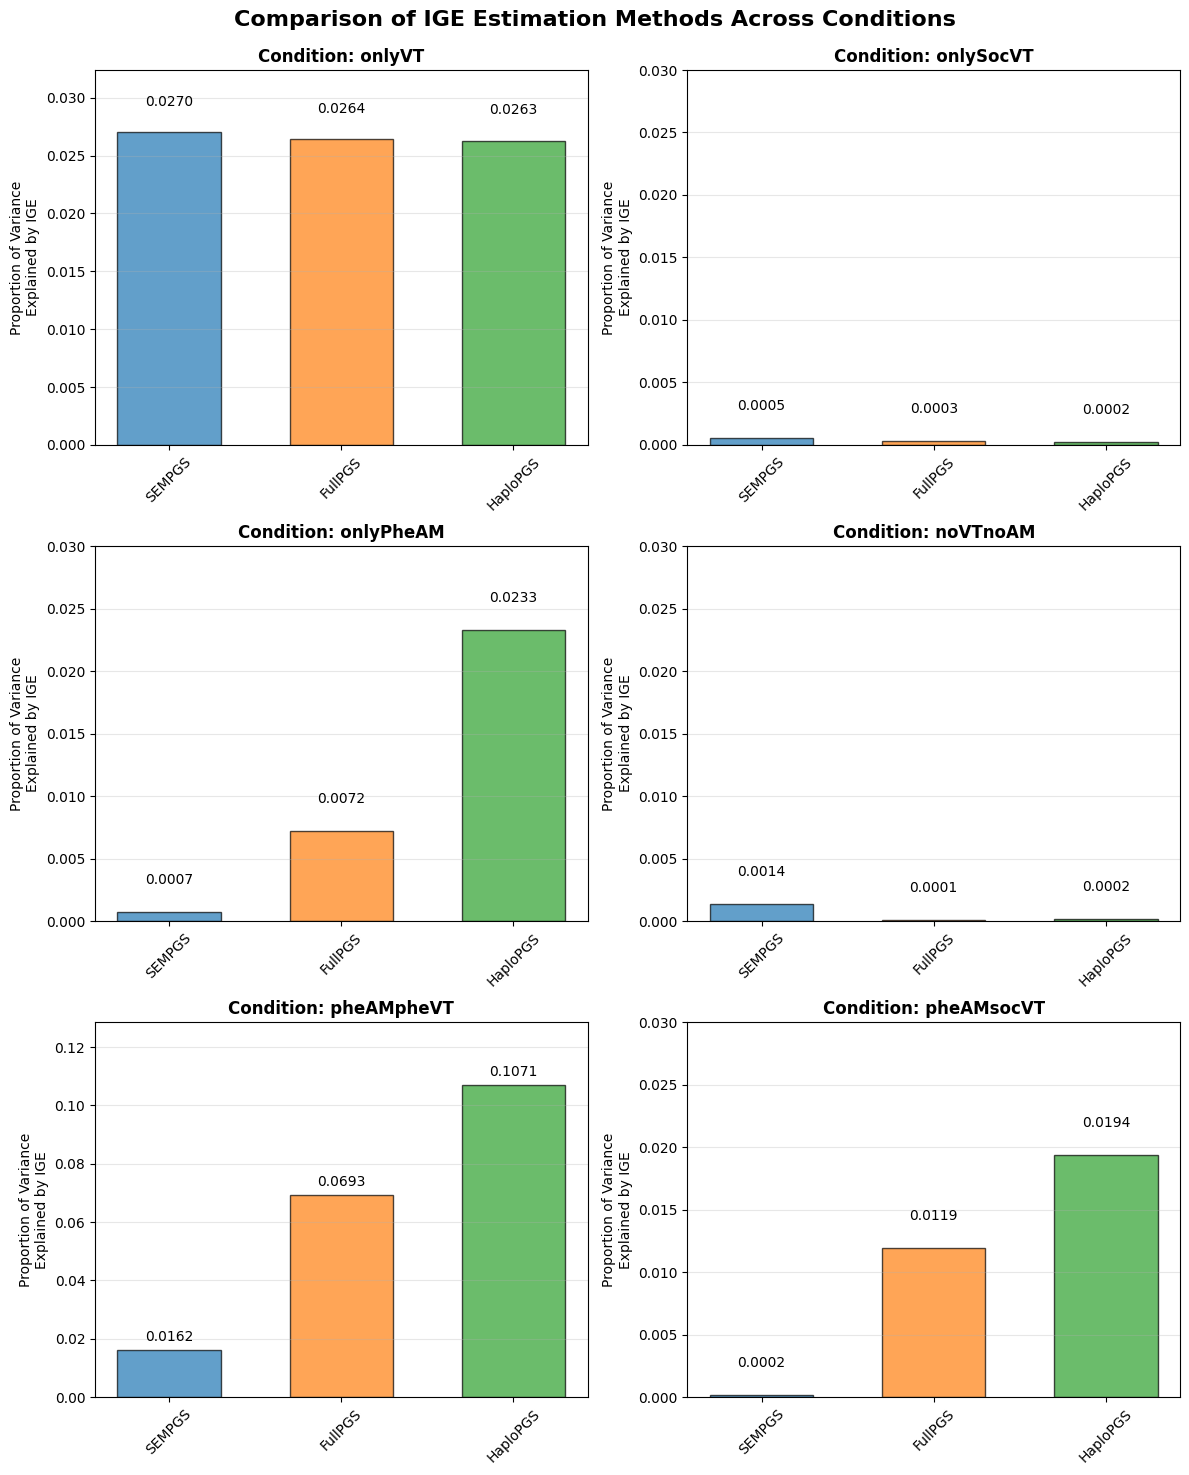

In [50]:
# Create a 3x2 grid of bar plots comparing the three methods for each condition
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

# Get all conditions
conditions = list(sem_pgs_ige_results.keys())

# Colors for each method with shorter names
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
method_names = ['SEMPGS', 'FullPGS', 'HaploPGS']  # Updated to shorter names

# Create bar plots for each condition
for i, condition in enumerate(conditions):
    ax = axes[i]
    
    # Get values for each method
    values = [
        sem_pgs_ige_results[condition],
        fullrgs_ige_results[condition], 
        kong_ige_results[condition]
    ]
    
    # Create bar plot with width parameter to ensure proper spacing
    bars = ax.bar(method_names, values, color=colors, alpha=0.7, 
                 edgecolor='black', linewidth=1, width=0.6)
    
    # Add value labels on top of bars with adjusted position
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{value:.4f}', ha='center', va='bottom', fontsize=10)
    
    # Customize plot
    ax.set_title(f'Condition: {condition}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Proportion of Variance\nExplained by IGE', fontsize=10)
    ax.set_ylim(0, max(max(values) * 1.2, 0.03))  # Ensure minimum y-limit of 0.03
    ax.grid(True, alpha=0.3, axis='y')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.suptitle('Comparison of IGE Estimation Methods Across Conditions', 
             fontsize=16, fontweight='bold', y=0.98)
plt.subplots_adjust(top=0.94)

plt.show()

In [55]:
# check the estimates from RDR
VG1_median = df_sum_RDR_VG1.loc[df_sum_RDR_VG1['condition'] == '01_t1pheVTnoAM_t2socVTnoAM', 'median'].values[0]
VG2_median = df_sum_RDR_VG2.loc[df_sum_RDR_VG2['condition'] == '01_t1pheVTnoAM_t2socVTnoAM', 'median'].values[0]
VG3_median = df_sum_RDR_VG3.loc[df_sum_RDR_VG3['condition'] == '01_t1pheVTnoAM_t2socVTnoAM', 'median'].values[0]
Vp_median = df_sum_RDR_Vp.loc[df_sum_RDR_Vp['condition'] == '01_t1pheVTnoAM_t2socVTnoAM', 'median'].values[0]
Ve_median = df_sum_RDR_Ve.loc[df_sum_RDR_Ve['condition'] == '01_t1pheVTnoAM_t2socVTnoAM', 'median'].values[0]

print("\nRDR estimates for trait 1 in condition '01_t1pheVTnoAM_t2socVTnoAM'\n")
print(f"VG1 (Direct Genetic Effects): {VG1_median:.4f}")
print(f"VG2 (Indirect Genetic Effects from Parents): {VG2_median:.4f}")
print(f"VG3 (Covariance between Direct and Indirect Genetic Effects): {VG3_median:.4f}")
print(f"Vp (Phenotypic Variance): {Vp_median:.4f}")

# get the proportion of variance explained by indirect genetic effects from RDR
rdr_ige_results = {}
rdr_ige_results['onlyVT'] = (VG2_median) / Vp_median
print(f"Proportion of Variance Explained by IGE from RDR: {rdr_ige_results['onlyVT']:.4f}")

# get the total proportion from SEM-PGS
sem_pgs_ige_total_results = {}
onlyPheVT_idx_ige_obs = (df_sum_SEMPGS['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_SEMPGS['variable'] == 'phi11')
onlyPheVT_idx_ige_lat = (df_sum_SEMPGS['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_SEMPGS['variable'] == 'rho11')
onlyPheVT_idx_VY  = (df_sum_SEMPGS['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_SEMPGS['variable'] == 'VY11')
sem_pgs_ige_total_results['onlyVT'] = (df_sum_SEMPGS.loc[onlyPheVT_idx_ige_obs, 'median'].values[0] + df_sum_SEMPGS.loc[onlyPheVT_idx_ige_lat, 'median'].values[0])/ df_sum_SEMPGS.loc[onlyPheVT_idx_VY, 'median'].values[0]
#print the numerator and denominator for checking
print(f"Numerator (phi11 + rho11): {df_sum_SEMPGS.loc[onlyPheVT_idx_ige_obs, 'median'].values[0] + df_sum_SEMPGS.loc[onlyPheVT_idx_ige_lat, 'median'].values[0]:.4f}")
print(f"Denominator (VY11): {df_sum_SEMPGS.loc[onlyPheVT_idx_VY, 'median'].values[0]:.4f}")
print(f"Total Proportion of Variance Explained by IGE from SEM-PGS: {sem_pgs_ige_total_results['onlyVT']:.4f}")


RDR estimates for trait 1 in condition '01_t1pheVTnoAM_t2socVTnoAM'

VG1 (Direct Genetic Effects): 0.7925
VG2 (Indirect Genetic Effects from Parents): 0.2873
VG3 (Covariance between Direct and Indirect Genetic Effects): 0.6735
Vp (Phenotypic Variance): 2.0314
Proportion of Variance Explained by IGE from RDR: 0.1414
Numerator (phi11 + rho11): 0.1388
Denominator (VY11): 2.0212
Total Proportion of Variance Explained by IGE from SEM-PGS: 0.0687


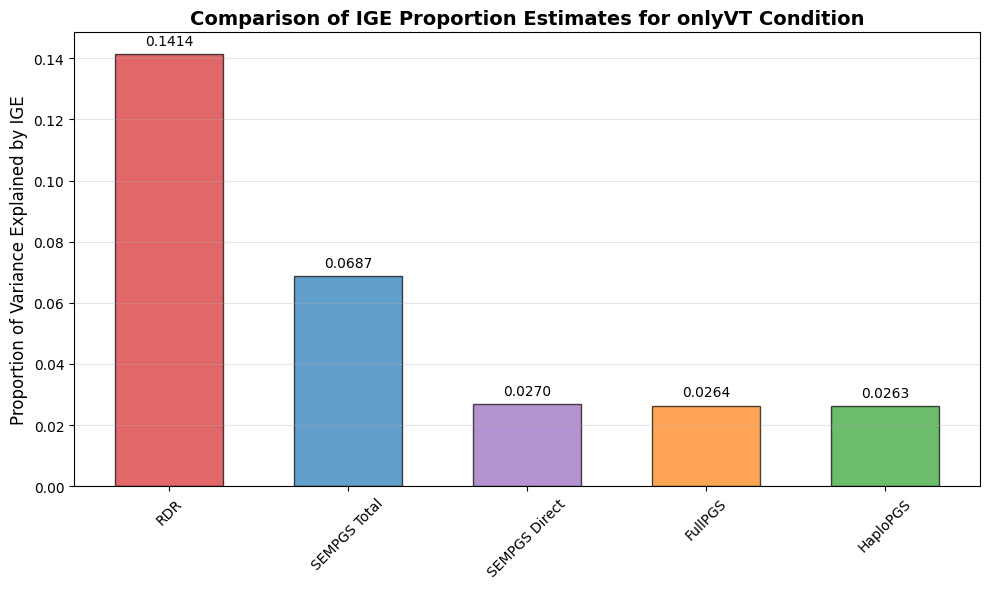

In [54]:
# Create a bar plot comparing RDR and SEM-PGS estimates for the 'onlyVT' condition
plt.figure(figsize=(10, 6))

# Data to plot
methods = ['RDR', 'SEMPGS Total', 'SEMPGS Direct', 'FullPGS', 'HaploPGS']
values = [
    rdr_ige_results['onlyVT'],
    sem_pgs_ige_total_results['onlyVT'],
    sem_pgs_ige_results['onlyVT'],
    fullrgs_ige_results['onlyVT'],
    kong_ige_results['onlyVT']
]

# Colors for the bars
colors = ['#d62728', '#1f77b4', '#9467bd', '#ff7f0e', '#2ca02c']

# Create bar plot
bars = plt.bar(methods, values, color=colors, alpha=0.7, 
               edgecolor='black', linewidth=1, width=0.6)

# Add value labels on top of bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.002,
            f'{value:.4f}', ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title('Comparison of IGE Proportion Estimates for onlyVT Condition', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Variance Explained by IGE', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

plt.show()

0.0545591781449352
0.0842837436133542
2.02116744050328


## Comprehensive IGE Methods Comparison

Now we'll use the new comparison script to compare all four methods: RDR, SEM-PGS (both direct and total), Full PGS regression, and Kong's haplotypic PGS regression.

In [4]:
# Import the comparison functions directly
import sys
sys.path.append('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis')

from compare_ige_methods import (
    load_rdr_data, load_sempgs_data, load_pgs_regression_data,
    calculate_rdr_ige_proportions, calculate_sempgs_ige_proportions,
    calculate_fullpgs_ige_proportions, calculate_kong_ige_proportions,
    create_violin_plot
)

In [7]:
# Example: Compare all four methods for condition 5, trait 1
condition = '05_t1pheVTnoAM_t2socVTnoAM_PGSall'
trait = 1

print(f"Analyzing condition: {condition}, trait: {trait}")
print("="*60)

# Load data from all methods
print("Loading data...")

# 1. Load RDR data
rdr_data = load_rdr_data(condition)
rdr_ige = calculate_rdr_ige_proportions(rdr_data, trait) if rdr_data is not None else None

# 2. Load SEM-PGS data
sempgs_data = load_sempgs_data(condition)
if sempgs_data is not None:
    sempgs_direct, sempgs_total = calculate_sempgs_ige_proportions(sempgs_data, trait)
else:
    sempgs_direct, sempgs_total = None, None

# 3. Load Full PGS data
fullpgs_data = load_pgs_regression_data(condition, trait, 'full_pgs')
fullpgs_ige = calculate_fullpgs_ige_proportions(fullpgs_data, trait) if fullpgs_data is not None else None

# 4. Load Kong PGS data
kong_data = load_pgs_regression_data(condition, trait, 'kong')
kong_ige = calculate_kong_ige_proportions(kong_data, trait) if kong_data is not None else None

# Print summary statistics
if rdr_ige is not None:
    print(f"RDR: {len(rdr_ige)} observations, mean={np.mean(rdr_ige):.4f}, std={np.std(rdr_ige):.4f}")

if sempgs_total is not None:
    print(f"SEM-PGS Total: {len(sempgs_total)} observations, mean={np.mean(sempgs_total):.4f}, std={np.std(sempgs_total):.4f}")

if sempgs_direct is not None:
    print(f"SEM-PGS Direct: {len(sempgs_direct)} observations, mean={np.mean(sempgs_direct):.4f}, std={np.std(sempgs_direct):.4f}")

if fullpgs_ige is not None:
    print(f"Full PGS: {len(fullpgs_ige)} observations, mean={np.mean(fullpgs_ige):.4f}, std={np.std(fullpgs_ige):.4f}")

if kong_ige is not None:
    print(f"Kong PGS: {len(kong_ige)} observations, mean={np.mean(kong_ige):.4f}, std={np.std(kong_ige):.4f}")

Analyzing condition: 05_t1pheVTnoAM_t2socVTnoAM_PGSall, trait: 1
Loading data...
RDR: 1000 observations, mean=0.1402, std=0.0149
SEM-PGS Total: 632 observations, mean=nan, std=nan
SEM-PGS Direct: 632 observations, mean=nan, std=nan
Full PGS: 1000 observations, mean=0.0711, std=0.0027
Kong PGS: 1000 observations, mean=0.0700, std=0.0056


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:211: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_plot, x='Method', y='IGE_Proportion',


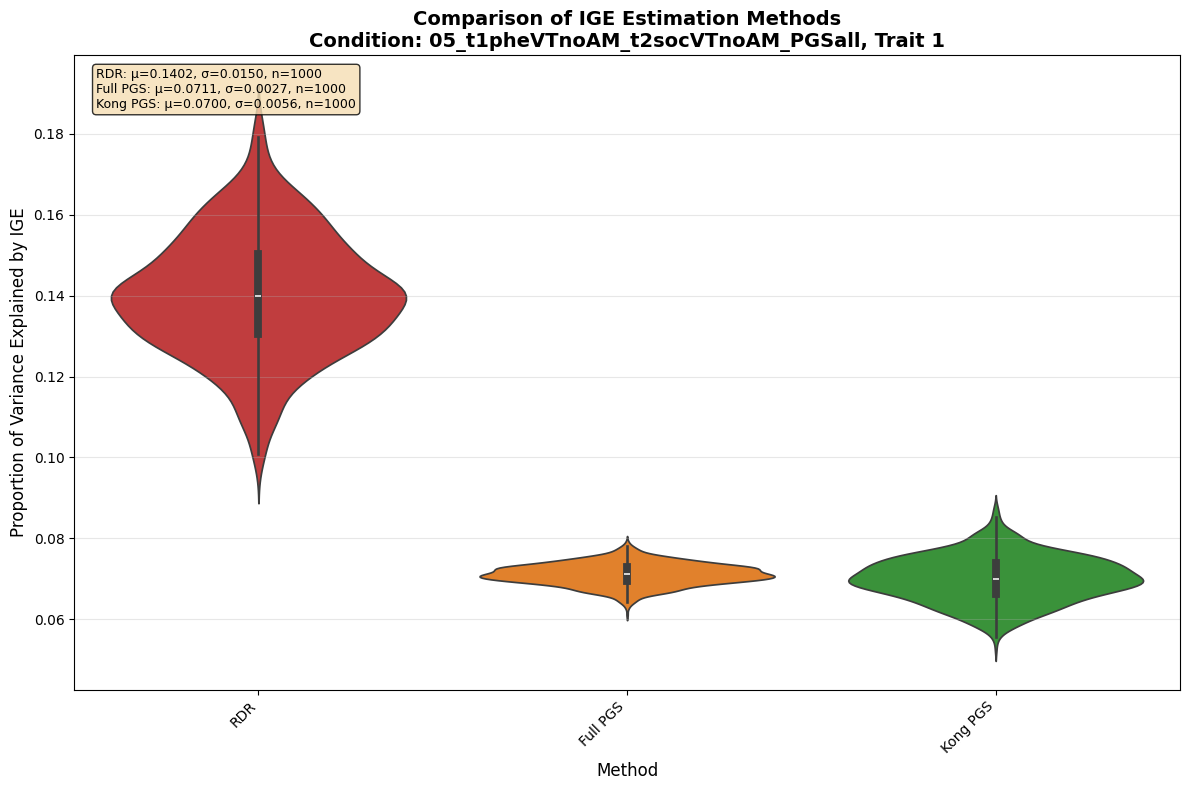

In [8]:
# Create the comparison violin plot
data_dict = {}

if rdr_ige is not None:
    data_dict['RDR'] = rdr_ige

if sempgs_total is not None:
    data_dict['SEM-PGS Total'] = sempgs_total

if sempgs_direct is not None:
    data_dict['SEM-PGS Direct'] = sempgs_direct

if fullpgs_ige is not None:
    data_dict['Full PGS'] = fullpgs_ige

if kong_ige is not None:
    data_dict['Kong PGS'] = kong_ige

# Generate the violin plot (no saving, just display)
if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

### Batch Analysis for Multiple Conditions

You can also run the comparison for multiple conditions and traits at once:

In [ ]:
# Batch analysis for conditions 5-8 and both traits
conditions_to_analyze = [
    '05_t1pheVTnoAM_t2socVTnoAM_PGSall',
    '06_t1noVTpheAM_t2noVTnoAM_PGSall',
    '07_t1noVTsocAM_t2noVTnoAM_PGSall',
    '08_t1noVTgenAM_t2noVTnoAM_PGSall'
]

traits_to_analyze = [1, 2]

for condition in conditions_to_analyze:
    for trait in traits_to_analyze:
        print(f"\n{'='*80}")
        print(f"Analyzing condition: {condition}, trait: {trait}")
        print('='*80)
        
        # Load data from all methods
        rdr_data = load_rdr_data(condition)
        rdr_ige = calculate_rdr_ige_proportions(rdr_data, trait) if rdr_data is not None else None
        
        sempgs_data = load_sempgs_data(condition)
        if sempgs_data is not None:
            sempgs_direct, sempgs_total = calculate_sempgs_ige_proportions(sempgs_data, trait)
        else:
            sempgs_direct, sempgs_total = None, None
        
        fullpgs_data = load_pgs_regression_data(condition, trait, 'full_pgs')
        fullpgs_ige = calculate_fullpgs_ige_proportions(fullpgs_data, trait) if fullpgs_data is not None else None
        
        kong_data = load_pgs_regression_data(condition, trait, 'kong')
        kong_ige = calculate_kong_ige_proportions(kong_data, trait) if kong_data is not None else None
        
        # Prepare data dictionary
        data_dict = {}
        
        if rdr_ige is not None:
            data_dict['RDR'] = rdr_ige
        if sempgs_total is not None:
            data_dict['SEM-PGS Total'] = sempgs_total
        if sempgs_direct is not None:
            data_dict['SEM-PGS Direct'] = sempgs_direct
        if fullpgs_ige is not None:
            data_dict['Full PGS'] = fullpgs_ige
        if kong_ige is not None:
            data_dict['Kong PGS'] = kong_ige
        
        # Create violin plot
        if data_dict:
            create_violin_plot(data_dict, condition, trait, save_path=None)
        else:
            print(f"No data available for {condition}, trait {trait}")